In [6]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization,Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import os, sys
import matplotlib.pyplot as plt
import librosa
from librosa import display
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import cv2

In [7]:
os.chdir('/content/drive/MyDrive/Audio_controlled_drone/wavdata/FTimages')

In [8]:
def create_dataset(img_folder):
  img_data_array = []
  class_name = []
  for dir in os.listdir(img_folder):
    for file in os.listdir(os.path.join(img_folder, dir)):
      img_path = os.path.join(img_folder, dir, file)
      image = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
      image = cv2.resize(image, (200, 200), interpolation = cv2.INTER_AREA)
      image=np.array(image)
      image = image.astype('float32')
      image /= 255 
      img_data_array.append(image)
      class_name.append(dir)
  return img_data_array, class_name

In [9]:
im = cv2.imread('hover/hover0.jpg')
print(im.shape)

(633, 1483, 3)


In [10]:
img_data, class_name = create_dataset('/content/drive/MyDrive/Audio_controlled_drone/wavdata/FTimages')

In [11]:
type(img_data)

list

In [12]:
type(class_name)

list

In [13]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
print(type(target_dict))
target_dict

<class 'dict'>


{'hover': 0,
 'land': 1,
 'mback': 2,
 'mfor': 3,
 'mleft': 4,
 'mright': 5,
 'takeoff': 6}

In [14]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]
type(target_val)

list

In [15]:
print(type(target_val))
print(target_val)
np.shape(target_val)

<class 'list'>
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

(700,)

In [16]:
print(type(img_data))
print(img_data)
np.shape(img_data)

Streaming output truncated to the last 5000 lines.

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32), array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1.

(700, 200, 200, 3)

In [17]:
target_val

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,


In [18]:
print(type(img_data))
np.shape(img_data)

<class 'list'>


(700, 200, 200, 3)

In [19]:
#X = tf.cast(np.array(img_data), tf.float64)
#print(type(X))
#np.shape(X)

In [20]:
img_data = np.array(img_data)
target_val = np.array(target_val)
labelencoder=LabelEncoder()
target_val=to_categorical(labelencoder.fit_transform(target_val))

print(type(target_val))
np.shape(target_val)

<class 'numpy.ndarray'>


(700, 7)

In [21]:
target_val

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:

#labelencoder=LabelEncoder()
#y=to_categorical(labelencoder.fit_transform(y))
X_train,X_test,y_train,y_test=train_test_split(img_data,target_val,test_size=0.2,shuffle=True, random_state=0)

In [23]:
print(type(X_train))
np.shape(X_train)

<class 'numpy.ndarray'>


(560, 200, 200, 3)

In [24]:
print(type(y_train))
np.shape(y_train)

<class 'numpy.ndarray'>


(560, 7)

In [43]:
from keras.layers import Convolution2D, Conv2D, ReLU,MaxPooling2D, GlobalAveragePooling2D
from keras.utils import np_utils
from sklearn import metrics 

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(GlobalAveragePooling2D())

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 198, 198, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 97, 97, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 46, 46, 64)       

In [44]:
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation = 'sigmoid'))
model.add(Dense(7, 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 198, 198, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 97, 97, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 46, 46, 64)       

In [27]:
# X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.125,shuffle=True, random_state=0)

In [45]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
#model_save_filename = "modelIM.h5"
#mdlcheckpoint_cb = keras.callbacks.ModelCheckpoint(model_save_filename, monitor="val_accuracy",mode='max', save_best_only=True)
history = model.fit(X_train, y_train, batch_size=16, epochs=1000,validation_data=(X_test, y_test), verbose=1) #callbacks=[mdlcheckpoint_cb],

Epoch 1/1000
35/35 [==============================] - 3s 41ms/step - loss: 1.9984 - accuracy: 0.1552 - val_loss: 2.0084 - val_accuracy: 0.1357
Epoch 2/1000
35/35 [==============================] - 1s 26ms/step - loss: 1.9235 - accuracy: 0.1715 - val_loss: 1.9676 - val_accuracy: 0.1357
Epoch 3/1000
35/35 [==============================] - 1s 26ms/step - loss: 1.8848 - accuracy: 0.1944 - val_loss: 1.9687 - val_accuracy: 0.1357
Epoch 4/1000
35/35 [==============================] - 1s 28ms/step - loss: 1.8121 - accuracy: 0.2573 - val_loss: 1.9536 - val_accuracy: 0.1571
Epoch 5/1000
35/35 [==============================] - 1s 26ms/step - loss: 1.7853 - accuracy: 0.3043 - val_loss: 1.9793 - val_accuracy: 0.1571
Epoch 6/1000
35/35 [==============================] - 1s 26ms/step - loss: 1.7466 - accuracy: 0.3697 - val_loss: 1.9472 - val_accuracy: 0.1571
Epoch 7/1000
35/35 [==============================] - 1s 26ms/step - loss: 1.7344 - accuracy: 0.3412 - val_loss: 2.0820 - val_accuracy: 0.1714

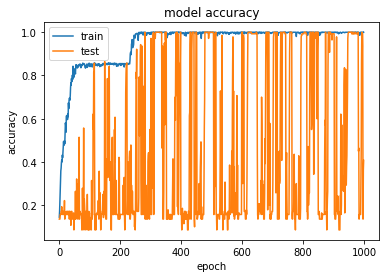

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns

In [48]:
y_pred = model.predict(X_test)

In [49]:
sypred = np.shape(y_pred)
# y_pred = model.predict_classes(y_pred)
# y_pred

In [50]:
predarray = []
for i in range(sypred[0]):
  maxi = 0
  for j in range(7):
    if y_pred[i][j] > maxi:
      maxi = y_pred[i][j]
      k = j
  for j in range(7):
    if j==k:
      y_pred[i][j] = 1;
      predarray.append(k)
    else:
      y_pred[i][j] = 0;

In [51]:
type(predarray)

list

In [52]:
# predarray = np.array(predarray)
type(predarray)

list

In [53]:
y_test_arr = []
for i in range(sypred[0]):
  maxi = 0
  for j in range(7):
    if y_test[i][j] > maxi:
      maxi = y_pred[i][j]
      k = j
  y_test_arr.append(k)

In [54]:
# y_test_arr = np.array(y_test_arr)
y_test_arr

[3,
 0,
 1,
 2,
 1,
 6,
 5,
 1,
 5,
 4,
 0,
 5,
 6,
 3,
 1,
 3,
 0,
 2,
 6,
 6,
 6,
 3,
 0,
 0,
 6,
 6,
 6,
 6,
 0,
 1,
 6,
 5,
 4,
 1,
 6,
 5,
 2,
 2,
 5,
 5,
 4,
 1,
 5,
 2,
 3,
 2,
 2,
 6,
 2,
 6,
 3,
 0,
 3,
 0,
 2,
 3,
 3,
 4,
 1,
 1,
 3,
 4,
 4,
 3,
 1,
 0,
 2,
 0,
 2,
 0,
 3,
 1,
 1,
 2,
 0,
 5,
 2,
 6,
 5,
 6,
 0,
 3,
 3,
 5,
 0,
 2,
 4,
 3,
 5,
 0,
 4,
 0,
 3,
 3,
 1,
 5,
 1,
 2,
 2,
 5,
 4,
 6,
 1,
 1,
 1,
 6,
 3,
 5,
 0,
 6,
 2,
 4,
 3,
 4,
 3,
 3,
 5,
 2,
 2,
 2,
 4,
 0,
 1,
 1,
 6,
 3,
 1,
 1,
 3,
 2,
 5,
 1,
 6,
 5,
 6,
 3,
 5,
 0,
 6,
 2]

In [55]:
predarray

[2,
 0,
 0,
 2,
 0,
 6,
 2,
 0,
 2,
 0,
 0,
 0,
 6,
 2,
 0,
 2,
 0,
 2,
 0,
 6,
 6,
 2,
 0,
 0,
 6,
 6,
 0,
 6,
 0,
 0,
 0,
 2,
 6,
 0,
 6,
 0,
 2,
 2,
 0,
 6,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 6,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 6,
 0,
 0,
 0,
 6,
 2,
 2,
 0,
 6,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 6,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 6,
 0,
 6,
 2,
 0,
 0,
 6,
 2]

In [56]:
y_pred

array([[0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
 

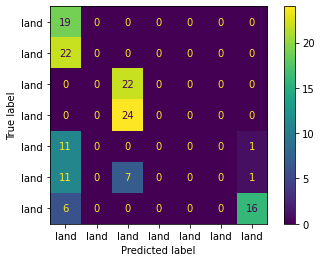

In [57]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_arr, predarray) #, labels = class_name)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_name)
sns.reset_orig()
disp.plot()

In [58]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.40714284777641296
